In [1]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is C8BF-BF78

 Directory of C:\Users\Maharaj Admin 1

04/28/2021  08:29 PM    <DIR>          .
04/28/2021  08:29 PM    <DIR>          ..
04/27/2021  06:45 PM    <DIR>          .conda
04/27/2021  06:27 PM                43 .condarc
04/28/2021  08:17 PM    <DIR>          .ipynb_checkpoints
04/17/2021  08:18 PM    <DIR>          .ipython
04/18/2021  03:43 PM    <DIR>          .jupyter
04/28/2021  08:21 PM    <DIR>          .keras
04/17/2021  08:21 PM    <DIR>          .matplotlib
04/07/2021  12:32 PM    <DIR>          .vscode
04/17/2021  09:25 PM    <DIR>          3D Objects
04/28/2021  08:20 PM    <DIR>          Audio-Classification-main
04/07/2021  04:47 PM               342 basics of html.html
04/17/2021  09:25 PM    <DIR>          Contacts
04/01/2021  03:51 PM    <DIR>          Documents
04/28/2021  02:08 PM    <DIR>          Downloads
04/28/2021  08:29 PM           915,734 EDA.ipynb
04/17/2021  09:35 PM    <DIR>          egoproje

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename='Urban/dog_bark.wav'

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

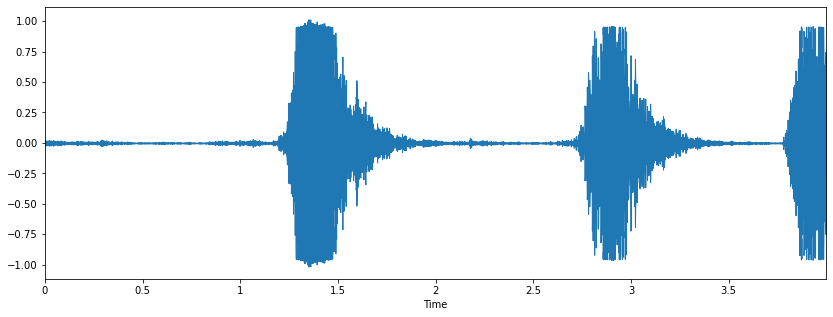

In [5]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

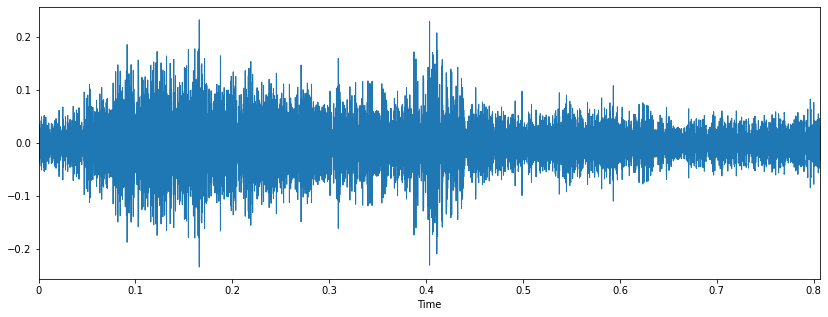

In [6]:
filename='Urban/fold2/18453-3-0-0.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [7]:
sample_rate

22050

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [9]:
wave_sample_rate

44100

In [10]:
wave_audio

array([[ -650,  -604],
       [ -888,  -525],
       [-1073,  -387],
       ...,
       [-1648,  -274],
       [-1695,  -324],
       [-1736,  -409]], dtype=int16)

In [11]:
data

array([-0.01494274, -0.02320228, -0.02607955, ..., -0.02282308,
       -0.03189641,  0.        ], dtype=float32)

In [12]:
import pandas as pd

metadata=pd.read_csv('Urban/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [13]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

children_playing    1000
jackhammer          1000
drilling            1000
street_music        1000
dog_bark            1000
air_conditioner     1000
engine_idling       1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [14]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='Urban/9674-1-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [15]:
print(librosa_audio_data)

[-0.03379861 -0.08911548 -0.09851468 ... -0.0489201  -0.01485279
 -0.00403072]


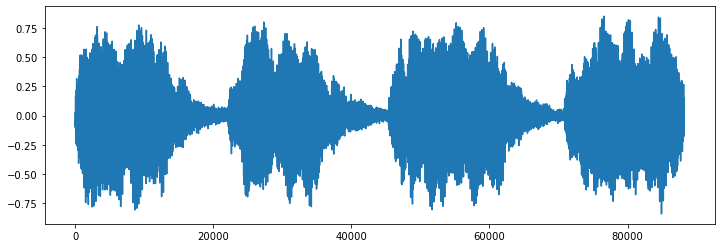

In [16]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [17]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [18]:
wave_audio

array([[-3987,  1070],
       [-5085,   928],
       [-6244,   820],
       ...,
       [-7854,  7694],
       [-7561,  7405],
       [-7185,  6372]], dtype=int16)

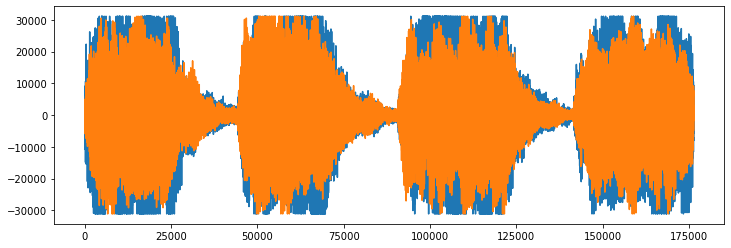

In [19]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [20]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [21]:
mfccs

array([[ -59.21239  ,  -53.48845  ,  -48.805134 , ..., -107.69855  ,
        -115.56701  , -118.35739  ],
       [  71.37312  ,   70.56442  ,   62.51735  , ...,   38.479454 ,
          46.5558   ,   57.378227 ],
       [ -54.451088 ,  -55.49135  ,  -58.29596  , ...,  -58.822254 ,
         -56.376663 ,  -65.632225 ],
       ...,
       [ -10.074682 ,  -17.390238 ,  -28.38607  , ...,  -31.643957 ,
         -30.317074 ,  -26.046532 ],
       [  -7.2588377,   -6.254104 ,   -6.598949 , ...,    2.3113914,
           2.795485 ,   -1.4518099],
       [   6.192969 ,   14.979428 ,   22.431389 , ...,   39.229103 ,
          42.609215 ,   38.273094 ]], dtype=float32)

In [22]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='Urban/'
metadata=pd.read_csv('Urban/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [23]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [24]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [04:24, 14.68it/s]D:\sai1\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8324it [10:06, 13.21it/s]D:\sai1\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8327it [10:06, 15.76it/s]D:\sai1\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [10:34, 13.76it/s]


In [25]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.180405,...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [26]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [27]:
X.shape

(8732, 40)

In [28]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [29]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786110e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844023e+00, -5.2119040e+00, -1.5936135e+00],
       [-4.9532028e+01,  1.5521893e-01, -2.0369110e+01, ...,
         2.0491769e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335975e-01,  6.4766800e-01,  7.8490514e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530845e+00, -8.9652127e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820302e+00, ...,
        -5.1484952e+00, -3.6400859e+00, -1.3321609e+00]], dtype=float32)

In [31]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [34]:
### No of classes
num_labels=y.shape[1]

In [35]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [37]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [38]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 3s 10ms/step - loss: 20.3377 - accuracy: 0.1157 - val_loss: 2.2868 - val_accuracy: 0.1208

Epoch 00001: val_loss improved from inf to 2.28679, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 2.6701 - accuracy: 0.1289 - val_loss: 2.2832 - val_accuracy: 0.1133

Epoch 00002: val_loss improved from 2.28679 to 2.28317, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 2.3580 - accuracy: 0.1291 - val_loss: 2.2646 - val_accuracy: 0.1322

Epoch 00003: val_loss improved from 2.28317 to 2.26460, saving model to saved_models\audio_classification.hdf5
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 2.2776 - accuracy: 0.1512 - val_loss: 2.2317 - val_accuracy: 0.1666

Epoch 00004: val_loss improved from 2.26460 to 2.23168, saving model to saved_models\audio_cl

219/219 [==============================] - 1s 3ms/step - loss: 1.2632 - accuracy: 0.5814 - val_loss: 1.0401 - val_accuracy: 0.6657

Epoch 00034: val_loss improved from 1.07308 to 1.04010, saving model to saved_models\audio_classification.hdf5
Epoch 35/100
219/219 [==============================] - 1s 3ms/step - loss: 1.2231 - accuracy: 0.5871 - val_loss: 1.0335 - val_accuracy: 0.6686

Epoch 00035: val_loss improved from 1.04010 to 1.03345, saving model to saved_models\audio_classification.hdf5
Epoch 36/100
219/219 [==============================] - 1s 3ms/step - loss: 1.1984 - accuracy: 0.5961 - val_loss: 0.9712 - val_accuracy: 0.6817

Epoch 00036: val_loss improved from 1.03345 to 0.97119, saving model to saved_models\audio_classification.hdf5
Epoch 37/100
219/219 [==============================] - 1s 3ms/step - loss: 1.1972 - accuracy: 0.6000 - val_loss: 1.0134 - val_accuracy: 0.6663

Epoch 00037: val_loss did not improve from 0.97119
Epoch 38/100
219/219 [===========================


Epoch 00071: val_loss did not improve from 0.82834
Epoch 72/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0784 - accuracy: 0.6404 - val_loss: 0.8064 - val_accuracy: 0.7459

Epoch 00072: val_loss improved from 0.82834 to 0.80641, saving model to saved_models\audio_classification.hdf5
Epoch 73/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9959 - accuracy: 0.6678 - val_loss: 0.8097 - val_accuracy: 0.7481

Epoch 00073: val_loss did not improve from 0.80641
Epoch 74/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0504 - accuracy: 0.6561 - val_loss: 0.8410 - val_accuracy: 0.7270

Epoch 00074: val_loss did not improve from 0.80641
Epoch 75/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0341 - accuracy: 0.6649 - val_loss: 0.8343 - val_accuracy: 0.7459

Epoch 00075: val_loss did not improve from 0.80641
Epoch 76/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0358 - accuracy: 0.6679 - 

In [39]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7630223035812378


In [42]:
prediction_feature.shape

(1, 40)

In [43]:
X_test[1]

array([-466.1843    ,    1.5388283 ,  -34.397358  ,   35.715332  ,
        -15.16693   ,  -18.850813  ,   -0.7415814 ,  -15.99989   ,
        -21.354332  ,    7.650683  ,  -29.031452  ,  -19.142824  ,
         -2.6798913 ,   -8.466883  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.8877535 ,   14.911873  ,   21.47102   ,
         21.336624  ,    0.91695195,  -18.795404  ,   -5.0017214 ,
         -0.7015265 ,    2.91399   ,   -6.710599  ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.65529805,  -23.953394  ,
        -15.200551  ,    9.21079   ,   10.4198    ,   -0.57916147,
         -1.2440346 ,   17.722294  ,   13.837573  ,   -5.164349  ],
      dtype=float32)

In [45]:
filename="Urban/fold4/7389-1-0-7.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-1.1529951e+02  7.7630737e+01 -2.6746471e+01  1.1913613e+01
 -2.3838348e+01  4.5895014e+00 -2.2225393e+01  1.3471798e+01
 -1.6347155e+01  1.0842655e+01 -1.4508278e+01  1.2412468e+01
 -1.1433424e+01  6.2360754e+00 -6.4578357e+00  2.8996627e+00
 -9.8214540e+00  4.2557449e+00 -7.4054751e+00  9.0389462e+00
 -5.9541020e+00 -2.4318235e+00 -9.0551634e+00 -7.5873499e+00
 -5.8932600e+00  7.4589038e+00 -6.0711317e+00 -1.3020414e+00
 -8.8667870e+00  5.3769236e+00  4.6329234e-02  6.7024012e-03
 -1.0119943e+01 -6.4213357e+00 -4.3124418e+00  2.5494235e+00
 -4.5992742e+00  6.1714225e+00  4.9375281e+00  2.0815413e+00]
[[-1.1529951e+02  7.7630737e+01 -2.6746471e+01  1.1913613e+01
  -2.3838348e+01  4.5895014e+00 -2.2225393e+01  1.3471798e+01
  -1.6347155e+01  1.0842655e+01 -1.4508278e+01  1.2412468e+01
  -1.1433424e+01  6.2360754e+00 -6.4578357e+00  2.8996627e+00
  -9.8214540e+00  4.2557449e+00 -7.4054751e+00  9.0389462e+00
  -5.9541020e+00 -2.4318235e+00 -9.0551634e+00 -7.5873499e+00
  -5.8932600e+00 

array(['drilling'], dtype='<U16')